[*********************100%%**********************]  1 of 1 completed


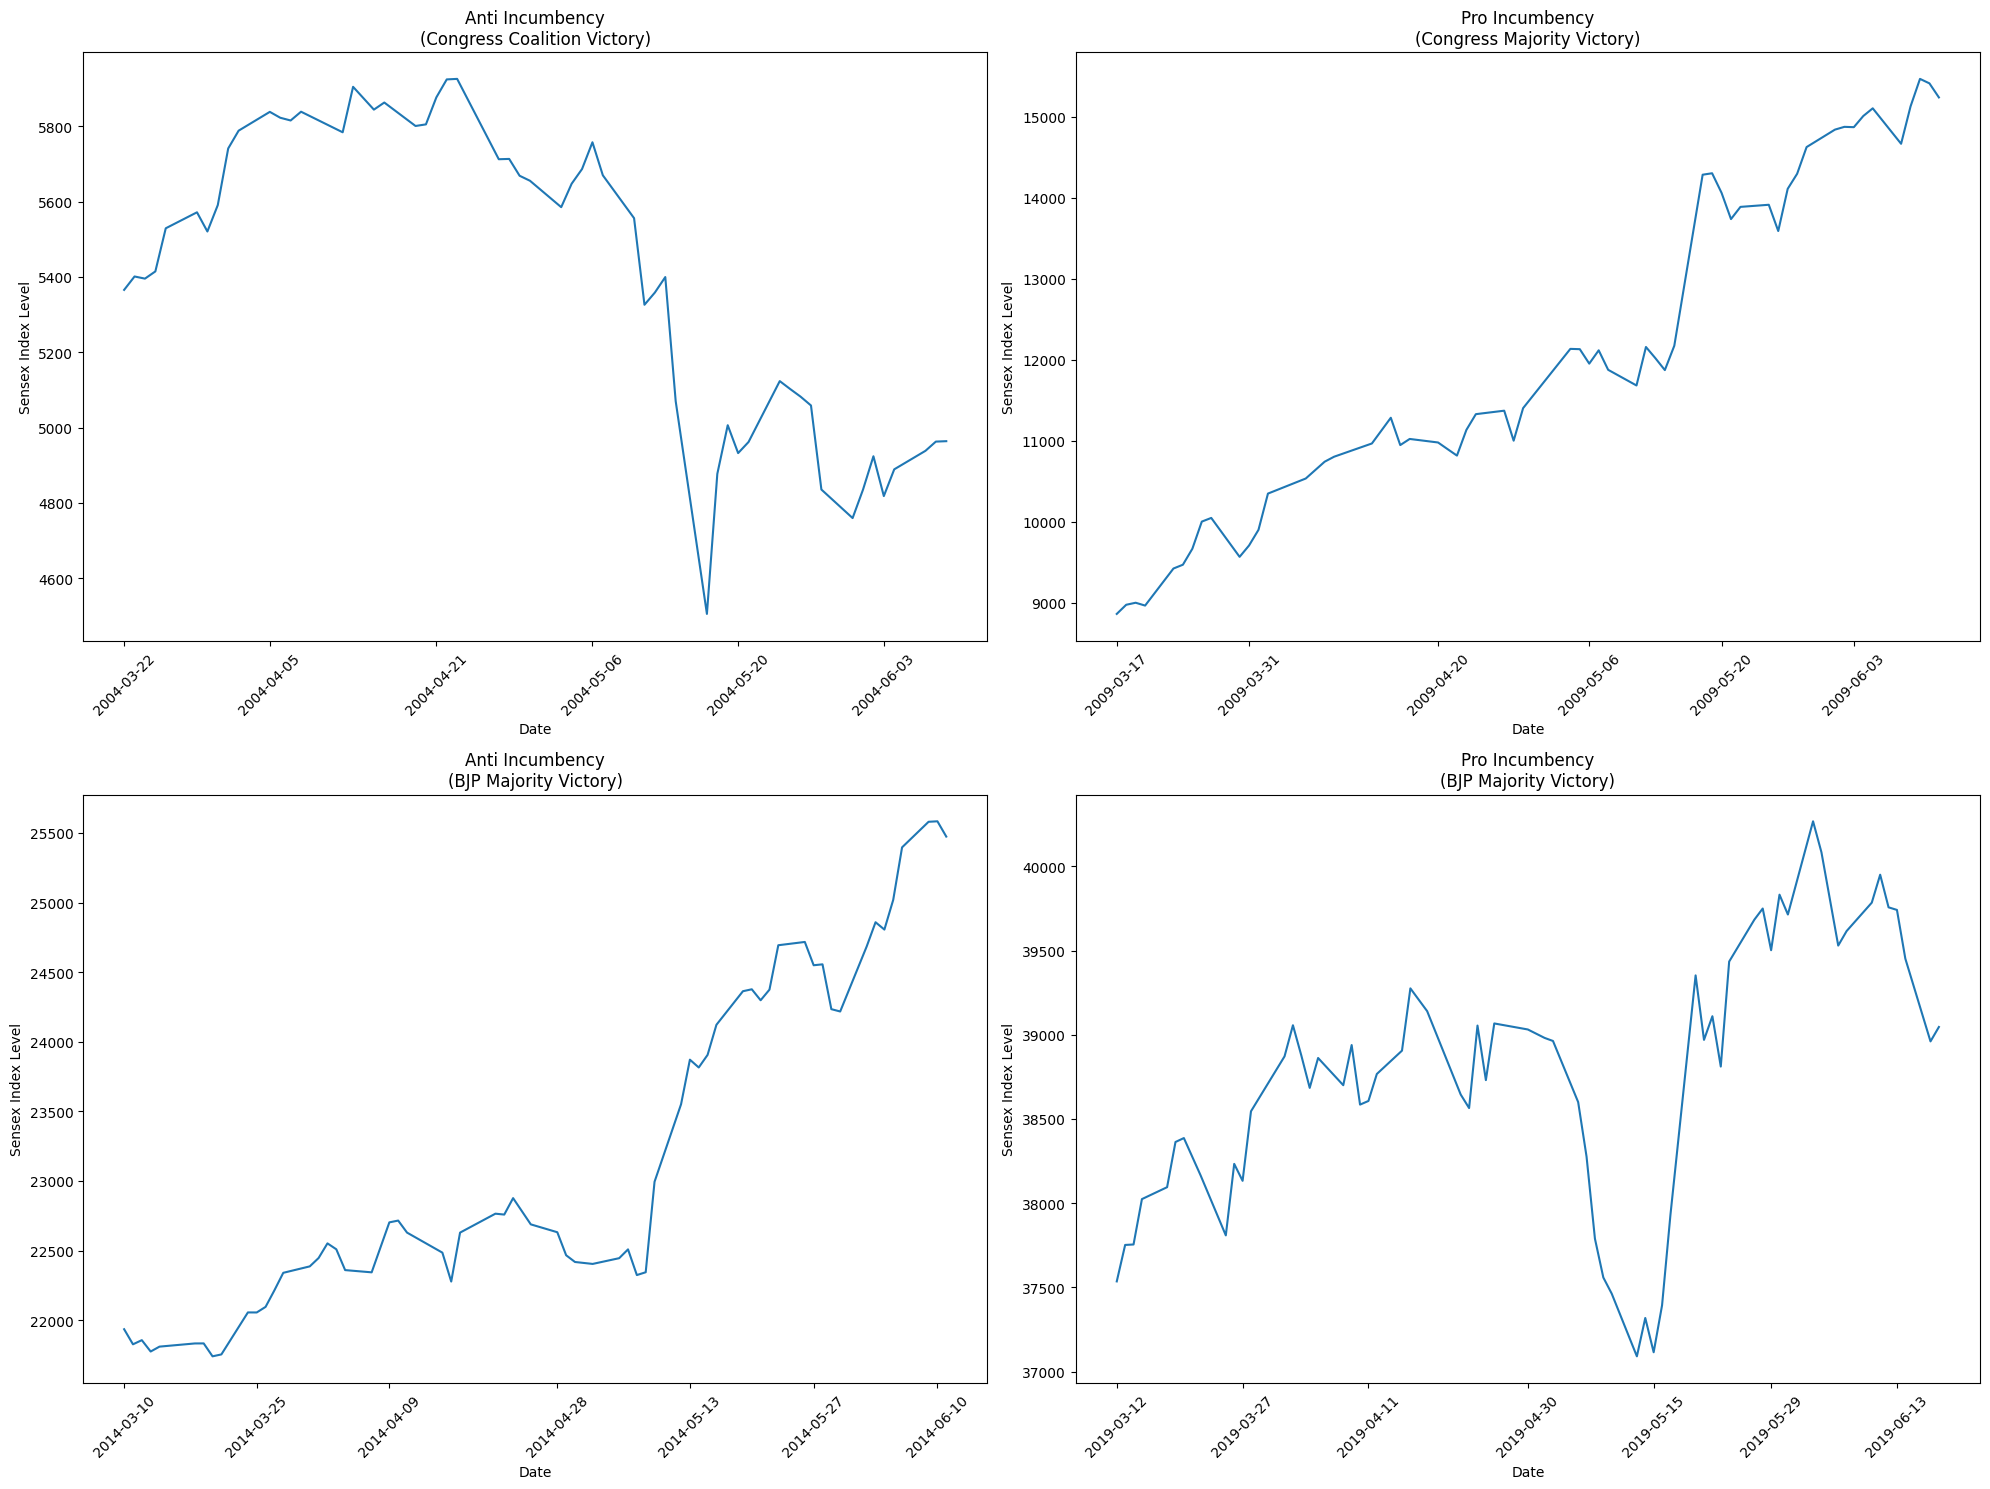

Volatility around 2004 elections: 0.025876816905156103.
Volatility around 2009 elections: 0.031178353303693885.
Volatility around 2014 elections: 0.00813999343001519.
Volatility around 2019 elections: 0.008842728857232992.


In [13]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
import seaborn as sns

# Loading the data for SENSEX
sensex = yf.download('^BSESN', start='1999-01-01', end='2024-01-01')

# Indian general election periods and outcomes from 2004 onwards
election_periods = [
    {'end_date': '2004-05-10', 'start_date': '2004-04-20', 'outcome': 'Congress Coalition'},
    {'end_date': '2009-05-13', 'start_date': '2009-04-16', 'outcome': 'Congress Majority'},
    {'end_date': '2014-05-12', 'start_date': '2014-04-07', 'outcome': 'BJP Majority'},
    {'end_date': '2019-05-19', 'start_date': '2019-04-11', 'outcome': 'BJP Majority'}
]

# Convert dates to datetime
for period in election_periods:
    period['start_date'] = datetime.strptime(period['start_date'], '%Y-%m-%d')
    period['end_date'] = datetime.strptime(period['end_date'], '%Y-%m-%d')

# Collect data for each period
election_data = []
window = 30  # days before and after election period

for period in election_periods:
    start_date = period['start_date'] - timedelta(days=window)
    end_date = period['end_date'] + timedelta(days=window)

    data = sensex.loc[start_date:end_date].copy()
    if not data.empty:
        data['Return'] = data['Adj Close'].pct_change()
        election_data.append((data, period['outcome']))

# Plot the data
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
titles = [
    'Anti Incumbency\n(Congress Coalition Victory)',
    'Pro Incumbency\n(Congress Majority Victory)',
    'Anti Incumbency\n(BJP Majority Victory)',
    'Pro Incumbency\n(BJP Majority Victory)'
]
axs = axs.flatten()

for i, (data, outcome) in enumerate(election_data):
    axs[i].plot(data.index, data['Adj Close'])
    axs[i].set_xticks(data.index[::10])  # Set x-ticks at regular intervals
    axs[i].set_xticklabels(data.index[::10].strftime('%Y-%m-%d'), rotation=45)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Sensex Index Level')
    axs[i].set_title(titles[i])

for j in range(len(election_data), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Calculate and print volatility
volatilities = [data['Return'].std() for data, _ in election_data]

for i, volatility in enumerate(volatilities):
    print(f'Volatility around {election_periods[i]["end_date"].year} elections: {volatility}.')

Checking data from 2004-03-21 00:00:00 to 2004-05-20 00:00:00 for election date 2004-04-20 00:00:00 (Congress Coalition)
Data around election date 2004-04-20 00:00:00 (Congress Coalition):
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2004-03-22  5446.879883  5446.879883  5347.049805  5365.399902  5365.399902   
2004-03-23  5356.970215  5450.379883  5324.779785  5400.990234  5400.990234   
2004-03-24  5412.129883  5435.399902  5345.149902  5395.279785  5395.279785   
2004-03-25  5403.379883  5438.859863  5368.879883  5414.439941  5414.439941   
2004-03-26  5448.290039  5552.339844  5448.290039  5528.939941  5528.939941   

            Volume    Return  
Date                          
2004-03-22   25400       NaN  
2004-03-23   31800  0.006633  
2004-03-24   26600 -0.001057  
2004-03-25   27000  0.003551  
2004-03-26   32400  0.021147  
                   Open         High    

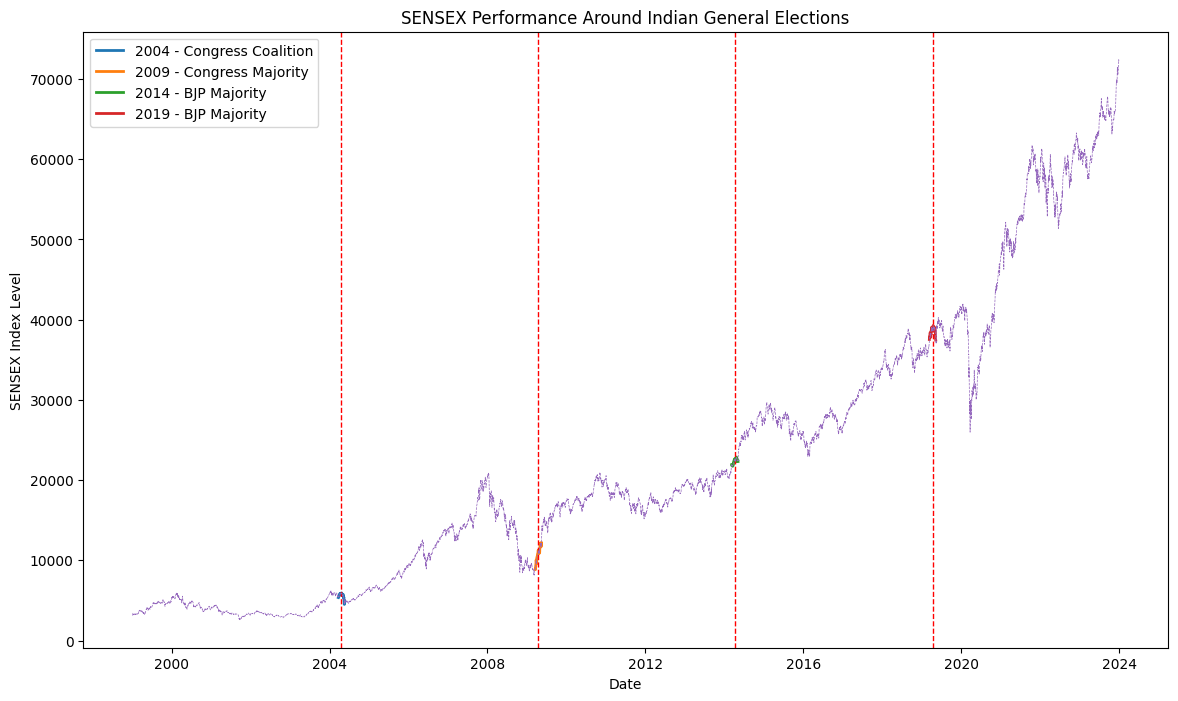

In [3]:
# Adjusting date
sensex.index = pd.to_datetime(sensex.index)
election_dates = {
    '2004-04-20': 'Congress Coalition',
    '2009-04-16': 'Congress Majority',
    '2014-04-07': 'BJP Majority',
    '2019-04-11': 'BJP Majority'
}
election_dates = {datetime.strptime(date, '%Y-%m-%d'): outcome for date, outcome in election_dates.items()}

# Calculate returns before and after elections
window = 30  # days before and after election
returns = []

for date in election_dates.keys():
    start_date = date - timedelta(days=window)
    end_date = date + timedelta(days=window)

    print(f"Checking data from {start_date} to {end_date} for election date {date} ({election_dates[date]})")

    data = sensex.loc[start_date:end_date].copy()
    if not data.empty:
        data['Return'] = data['Adj Close'].pct_change()
        returns.append((data, election_dates[date]))
        print(f"Data around election date {date} ({election_dates[date]}):")
        print(data.head())
        print(data.tail())
    else:
        print(f"No data found for the range {start_date} to {end_date}")

# Plot the data
plt.figure(figsize=(14, 8))

for data, outcome in returns:
    sns.lineplot(x=data.index, y=data['Adj Close'], label=f'{data.index[window].year} - {outcome}', lw=2)

for date in election_dates.keys():
    plt.axvline(x=date, color='r', linestyle='--', lw=1)

plt.plot(sensex['Adj Close'], linestyle='--', lw=0.5)
plt.xlabel('Date')
plt.ylabel('SENSEX Index Level')
plt.title('SENSEX Performance Around Indian General Elections')
plt.legend()
plt.show()

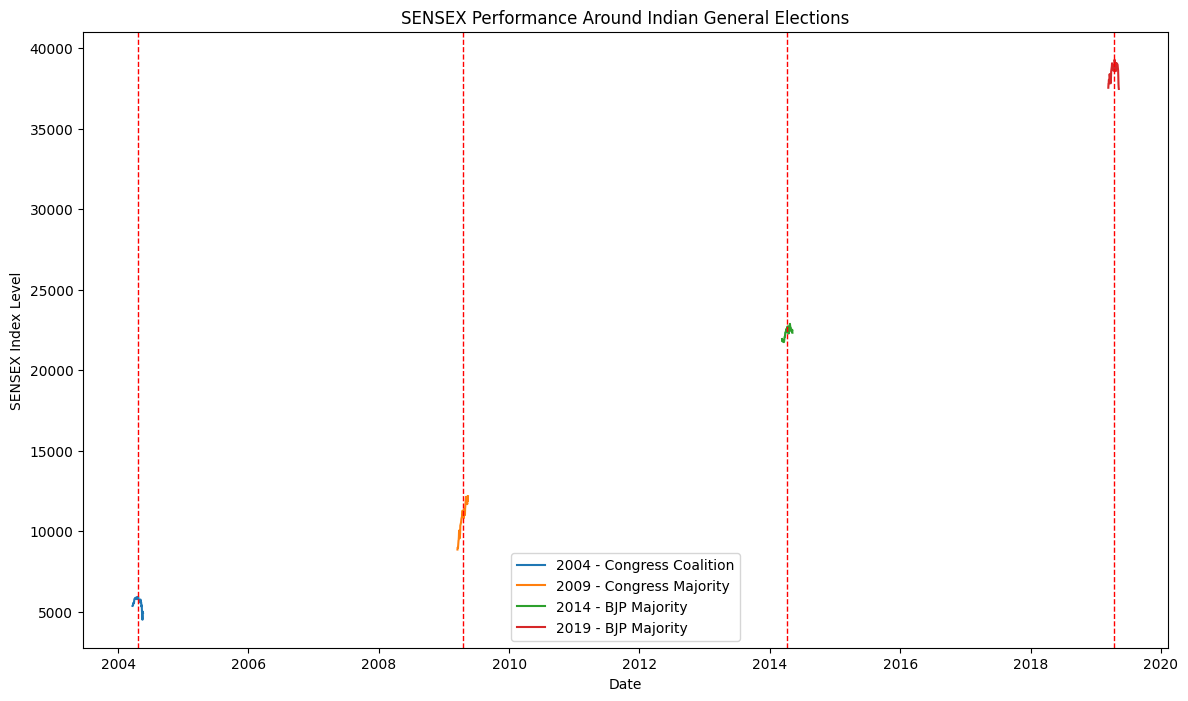

In [4]:
# Plot the data (just around elections)
plt.figure(figsize=(14, 8))

for data, outcome in returns:
    sns.lineplot(x=data.index, y=data['Adj Close'], label=f'{data.index[window].year} - {outcome}')

for date in election_dates.keys():
    plt.axvline(x=date, color='r', linestyle='--', lw=1)

plt.xlabel('Date')
plt.ylabel('SENSEX Index Level')
plt.title('SENSEX Performance Around Indian General Elections')
plt.legend()
plt.show()

#SENSEX performance around Indian general elections

In [5]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add SENSEX data
fig.add_trace(go.Scatter(x=sensex.index, y=sensex['Adj Close'], mode='lines', name='SENSEX'))

# Add election dates as vertical lines
for date in election_dates.keys():
    fig.add_shape(type="line",
                  x0=date, y0=sensex['Adj Close'].min(),
                  x1=date, y1=sensex['Adj Close'].max(),
                  line=dict(color="red", width=1, dash="dash"),
                  name=f"Election Date ({election_dates[date]})")

# Add hover text
fig.update_traces(hoverinfo="text+name",
                  hovertext=[f"Date: {date}<br>SENSEX: {adj_close}" for date, adj_close in zip(sensex.index, sensex['Adj Close'])])

# Update layout
fig.update_layout(title="SENSEX Performance Around Indian General Elections",
                  xaxis_title="Date",
                  yaxis_title="SENSEX Index Level",
                  hovermode="x unified")

# Show figure
fig.show()


#Additional Visualisations

**1. Correlation Heatmap**

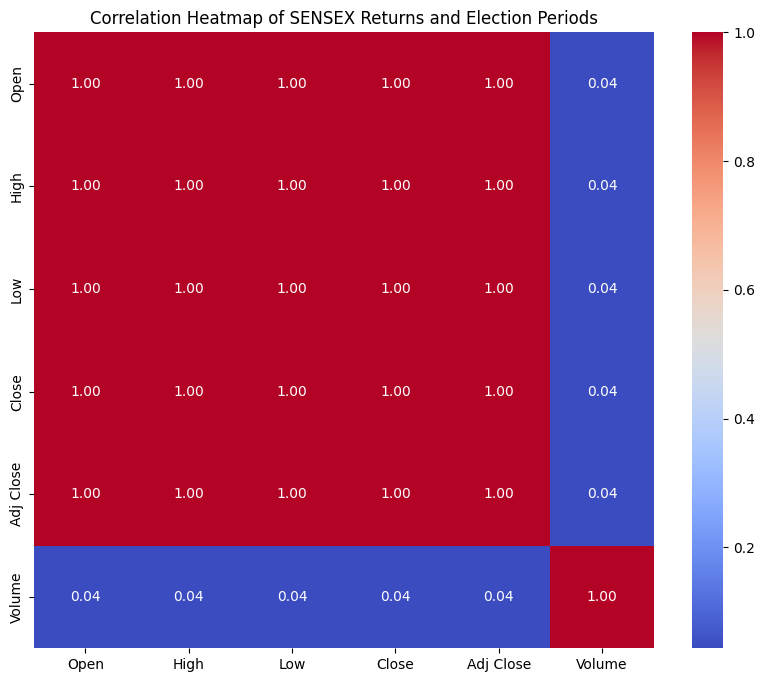

In [6]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = sensex.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of SENSEX Returns and Election Periods')
plt.show()


**2. Volatility Comparison Plot**

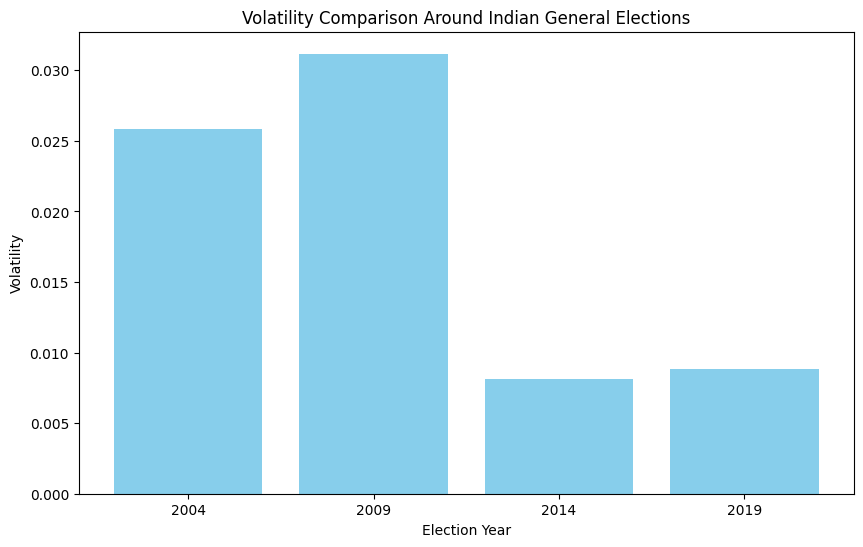

In [37]:
# Volatility Comparison Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(election_periods)), volatilities, color='skyblue')
plt.xlabel('Election Year')
plt.ylabel('Volatility')
plt.title('Volatility Comparison Around Indian General Elections')
plt.xticks(range(len(election_periods)), [period['end_date'].year for period in election_periods])
plt.show()

**3. Cumulative Returns Plot**

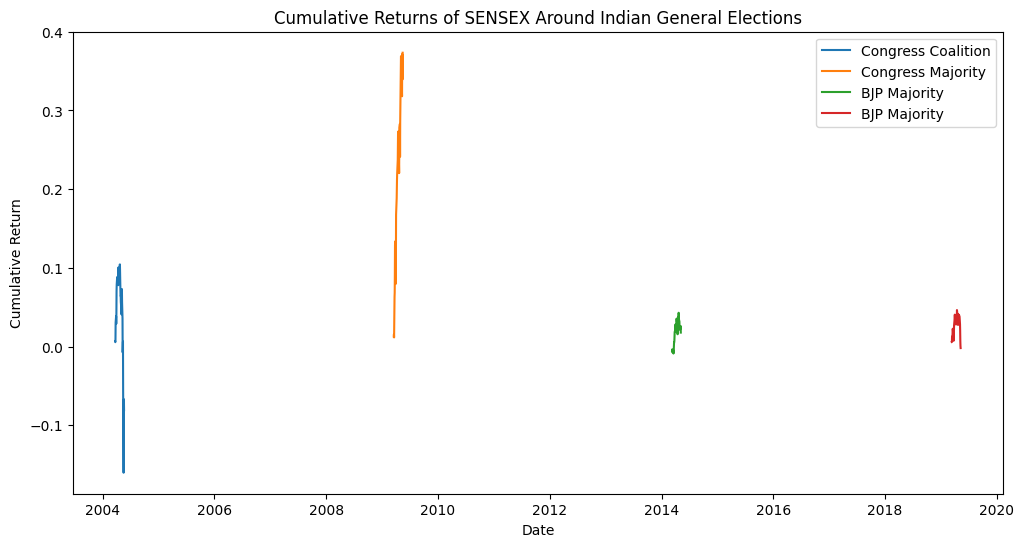

In [34]:
plt.figure(figsize=(12, 6))
for data, outcome in returns:
    cumulative_returns = (1 + data['Return']).cumprod() - 1
    plt.plot(cumulative_returns.index, cumulative_returns, label=outcome)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of SENSEX Around Indian General Elections')
plt.legend()
plt.show()

**4. Density Plot of Returns**

<ipython-input-36-ddc5e8b53f06>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-36-ddc5e8b53f06>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-36-ddc5e8b53f06>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-36-ddc5e8b53f06>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




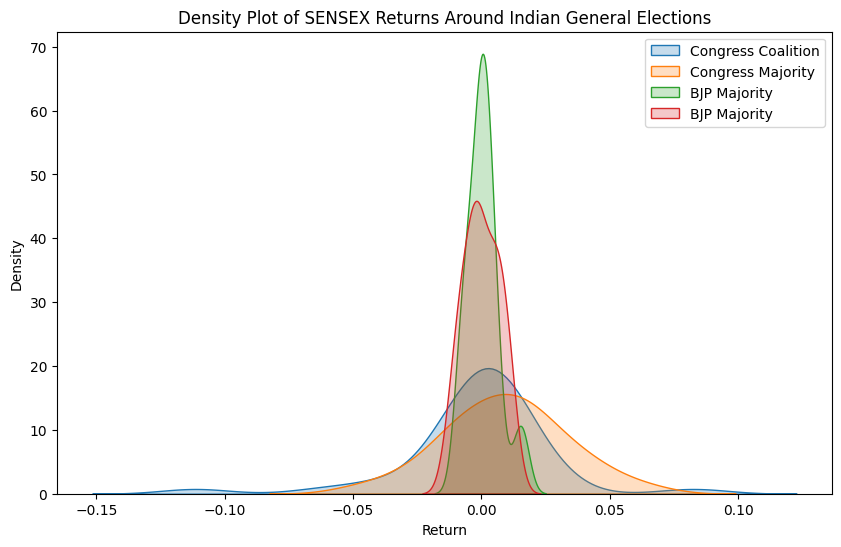

In [36]:
plt.figure(figsize=(10, 6))
for data, outcome in returns:
    sns.kdeplot(data['Return'], label=outcome, shade=True)
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Density Plot of SENSEX Returns Around Indian General Elections')
plt.legend()
plt.show()